In [1]:
from google.colab import files
uploaded = files.upload()

Saving Churn_data.csv to Churn_data.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('Churn_data.csv',encoding='unicode_escape')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.size

147903

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
df["TotalCharges"]=df["TotalCharges"].replace(' ',"0")

In [11]:
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [12]:
df.duplicated().sum()

np.int64(0)

In [16]:
def conv(value):
    if(value==0):
        return "no"

    else:
        return "yes"

In [17]:
df["SeniorCitizen"]=df["SeniorCitizen"].apply(conv)

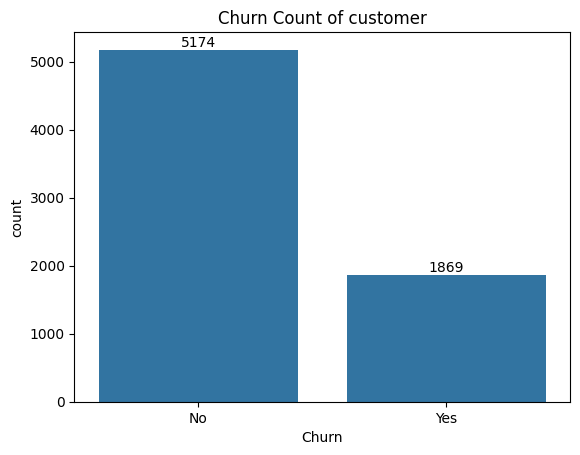

In [27]:
ax=sns.countplot(x="Churn",data=df)
ax.bar_label(ax.containers[0])
plt.title("Churn Count of customer")
plt.show()

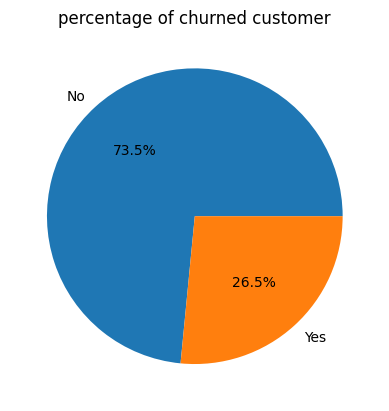

In [28]:
gb=df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels=gb.index,autopct='%1.1f%%')
plt.title("percentage of churned customer")
plt.show()

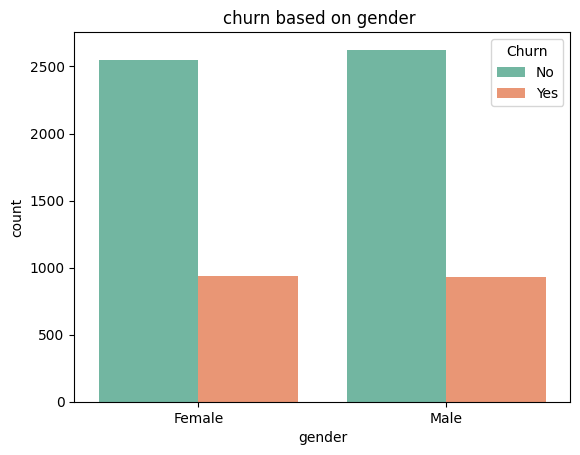

In [47]:
sns.countplot(x="gender",hue="Churn",data=df,palette="Set2")
plt.title("churn based on gender ")
plt.show()

Churning is not gender specific equal ratio of male and females are churning out and in total 26.5% of customer have been churned out

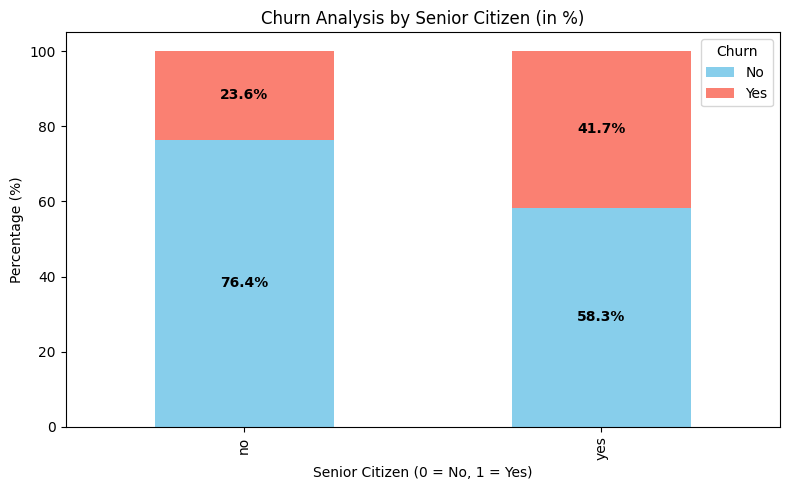

In [31]:
churn_perc = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# Step 2: Plot stacked bar chart
ax = churn_perc.plot(
    kind='bar',
    stacked=True,
    color=['skyblue', 'salmon'],
    figsize=(8, 5)
)

plt.title('Churn Analysis by Senior Citizen (in %)')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Percentage (%)')
plt.legend(title='Churn', loc='upper right')

# Step 3: Add percentage labels inside bars
for i, (index, row) in enumerate(churn_perc.iterrows()):
    cumulative = 0
    for col in churn_perc.columns:
        val = row[col]
        if val > 0:  # only label non-zero parts
            ax.text(
                i,
                cumulative + val / 2,
                f"{val:.1f}%",
                ha='center',
                va='center',
                color='black',
                fontsize=10,
                fontweight='bold'
            )
        cumulative += val

plt.tight_layout()
plt.show()

senior citizen customer are less but out of total senior citizen more number of senior citizens are churning out

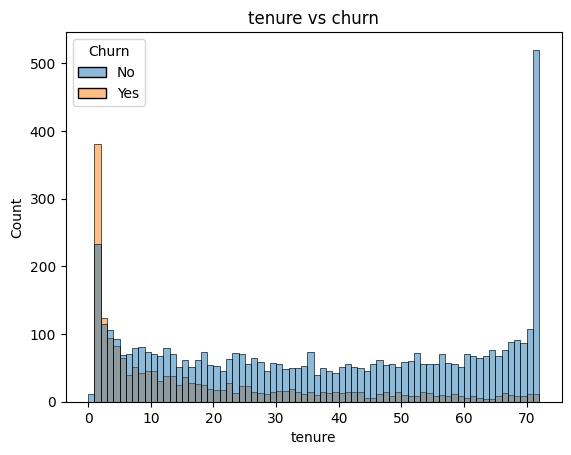

<Figure size 4000x600 with 0 Axes>

<Figure size 4000x600 with 0 Axes>

In [49]:
sns.histplot(x="tenure",data=df,hue="Churn",bins=72)
plt.title("tenure vs churn")
plt.show()
plt.figure(figsize=(40, 6))

less people are churning who have been using our service for longer period .
more no of people are churning in initial tenure of service

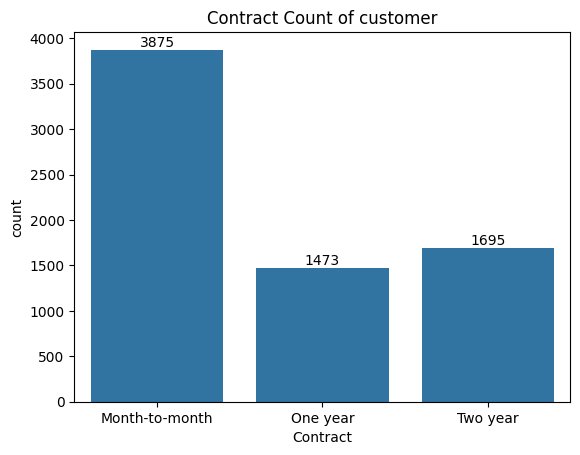

In [39]:
ax=sns.countplot(x="Contract",data=df)
ax.bar_label(ax.containers[0])
plt.title("Contract Count of customer")
plt.show()

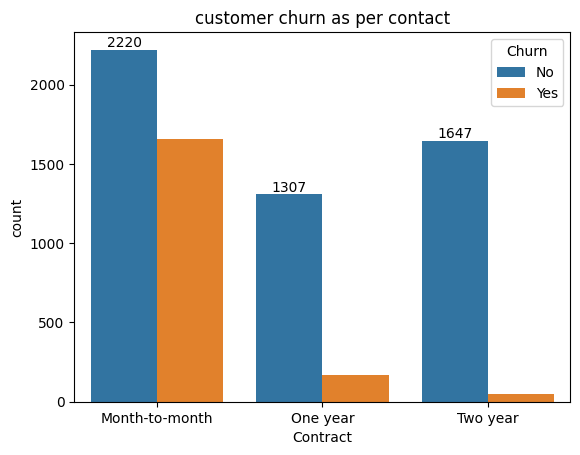

In [40]:
ax=sns.countplot(x="Contract",hue="Churn",data=df)
ax.bar_label(ax.containers[0])
plt.title("customer churn as per contact")
plt.show()


In [41]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

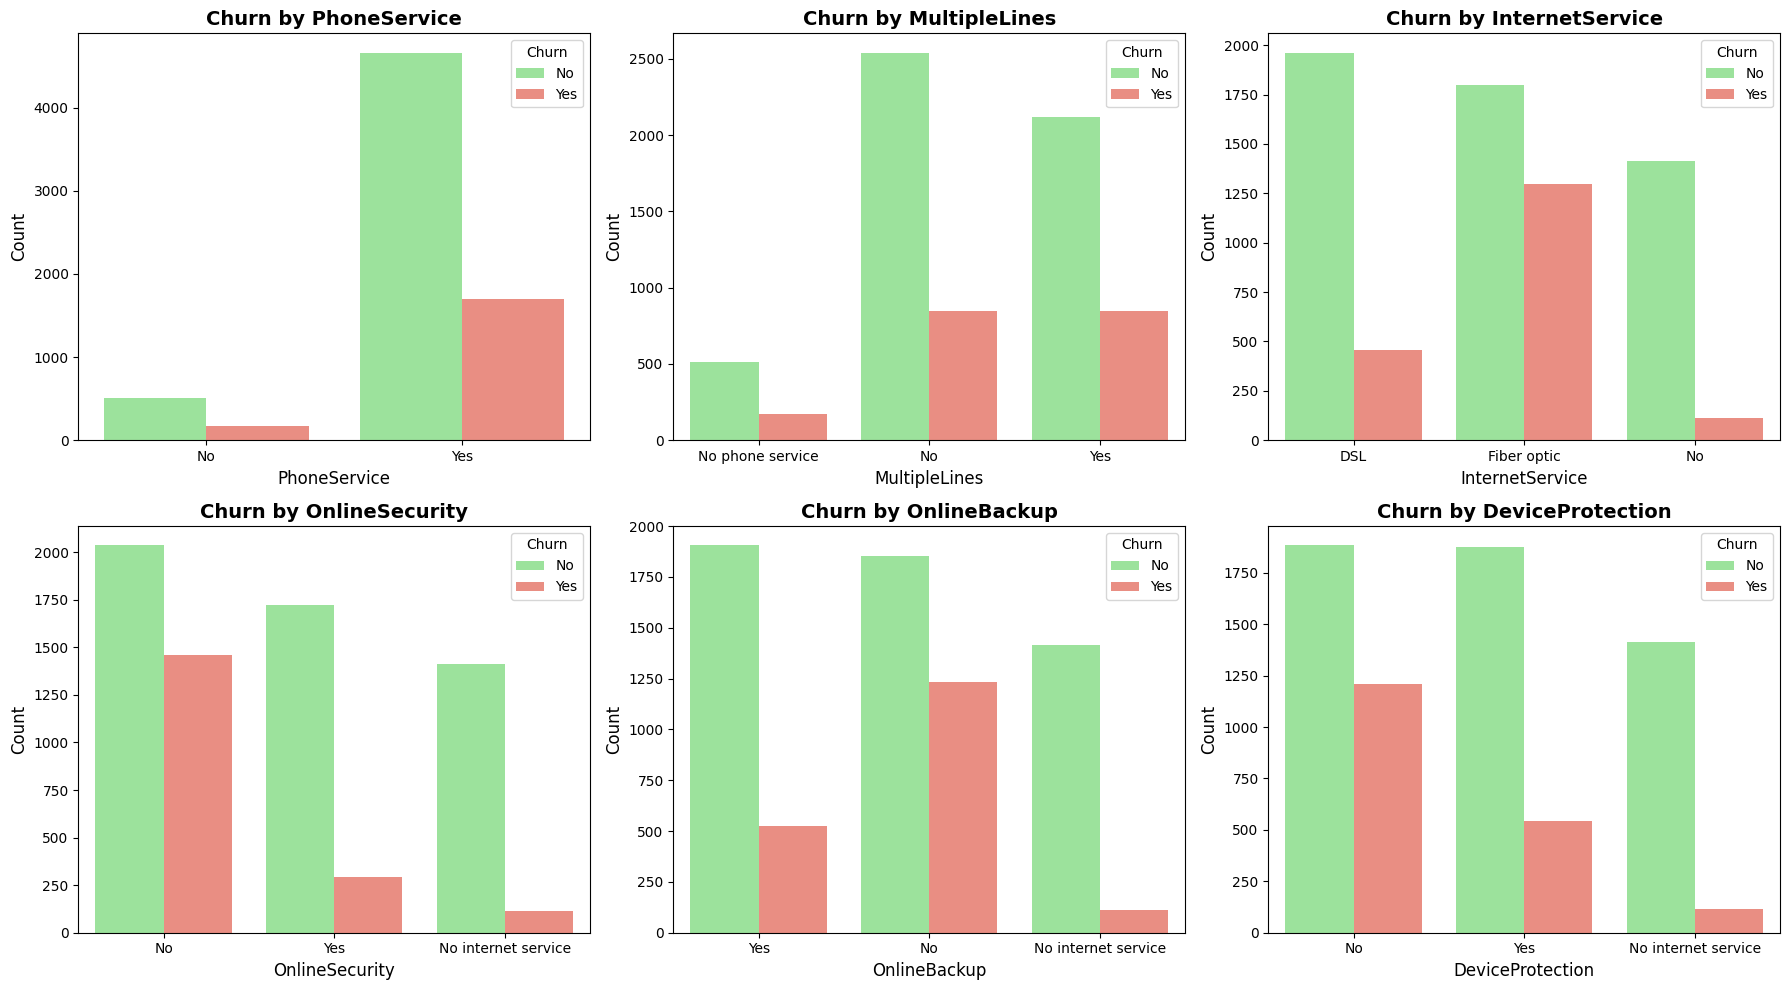

In [45]:
features = [
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection'
]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.countplot(
        data=df,
        x=col,
        hue='Churn',
        palette=['lightgreen', 'salmon'],
        ax=axes[i]
    )
    axes[i].set_title(f'Churn by {col}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].legend(title='Churn', loc='upper right')

plt.tight_layout()
plt.show()

Customers without added services (OnlineSecurity, OnlineBackup, DeviceProtection) tend to churn more.

Among internet users, Fiber optic subscribers are most likely to churn.

Value-added services like online security and device protection appear to reduce churn, indicating that promoting these features could improve retention.

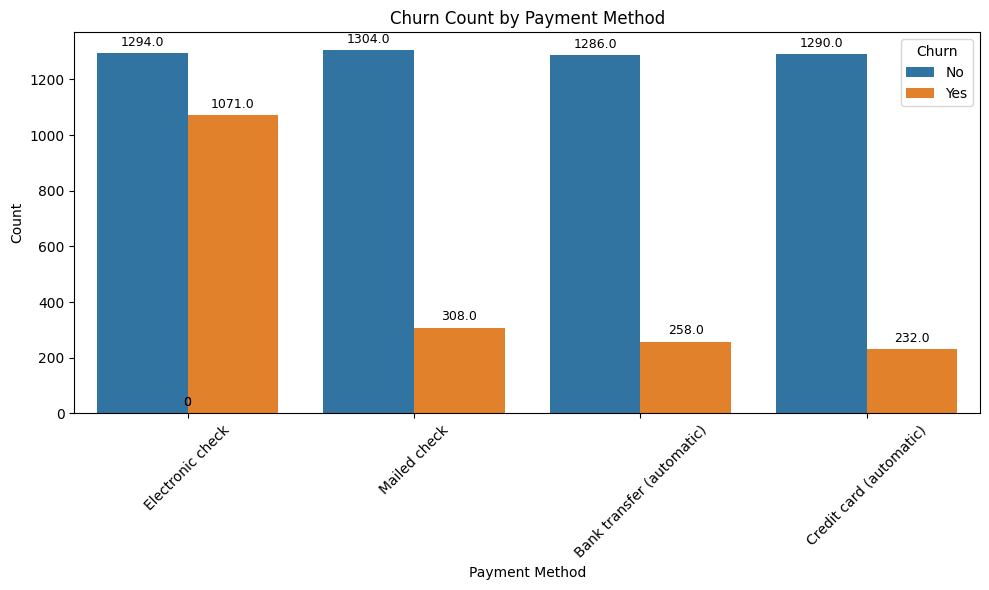

In [46]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(data=df, x='PaymentMethod', hue='Churn')

plt.xticks(rotation=45)
plt.title('Churn Count by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.legend(title='Churn')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 3),
                textcoords='offset points')

plt.tight_layout()
plt.show()

customer  with using electronic check are more likely to churn